## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: выполнены все задания

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('./homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, random_state=42)

/home/daria/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline

x_train = train.drop(columns=['f1'])
x_test = test.drop(columns=['f1'])
y_train = train['f1']
y_test = test['f1']

lasso = Lasso(alpha=0.01)
lr = LinearRegression()
minmax = MinMaxScaler()
stand = StandardScaler()

minmax_lasso = Pipeline([('minmax', minmax), ('lasso', lasso)]).fit(x_train, y_train)
print('lasso, minmax scaling', minmax_lasso.score(x_test, y_test))

lasso = Lasso(alpha=0.01)
stand_lasso = Pipeline([('stand', stand), ('lasso', lasso)]).fit(x_train, y_train)
print('lasso, standard scaling', stand_lasso.score(x_test, y_test))
      
minmax_lr = Pipeline([('minmax', minmax), ('lr', lr)]).fit(x_train, y_train)
print('linear regression, minmax scaling', minmax_lr.score(x_test, y_test))

lr = LinearRegression()
stand_lr = Pipeline([('stand', stand), ('lr', lr)]).fit(x_train, y_train)
print('linear regression, standard scaling', stand_lr.score(x_test, y_test))

lasso, minmax scaling 0.5342563646475411
lasso, standard scaling 0.49152622319271877
linear regression, minmax scaling 0.4799408987610372
linear regression, standard scaling 0.47994089876103707


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [6]:
print(minmax_lasso.named_steps['lasso'].coef_)
print(stand_lasso.named_steps['lasso'].coef_)
print(minmax_lr.named_steps['lr'].coef_)
print(stand_lr.named_steps['lr'].coef_)

[ 4.52409084 -0.         -0.          0.03807787  0.72527362  0.        ]
[ 0.91654943 -0.01475931 -0.04294885  0.02392738  0.16376442  0.        ]
[ 4.76700358 -0.08580226 -0.28849796  0.10520103  1.38159276  0.01781414]
[ 0.92547018 -0.02421687 -0.0533652   0.0317247   0.1739215   0.00195512]


Векторы весов для моделей с разным масштабированием различаются. Нулевые веса в силу специфики L1-регуляризации появляются только в методе Lasso, в методе LinearRegression все веса ненулевые. При применении минимаксного масштабирования обнуляются три компоненты вектора весов, стандартного - только одна. Зависимость от первого признака значительно сильнее остальных, зависимость от последнего ничтожно мала (в модели с L1-регуляризацией этот признак был исключен из рассмотрения путем обнуления соответствующей ему компоненты вектора весов при всех рассмотренных способах масштабирования). Зависимость от остальных признаков есть, но довольно слабая.

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

Populating the interactive namespace from numpy and matplotlib


/home/daria/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


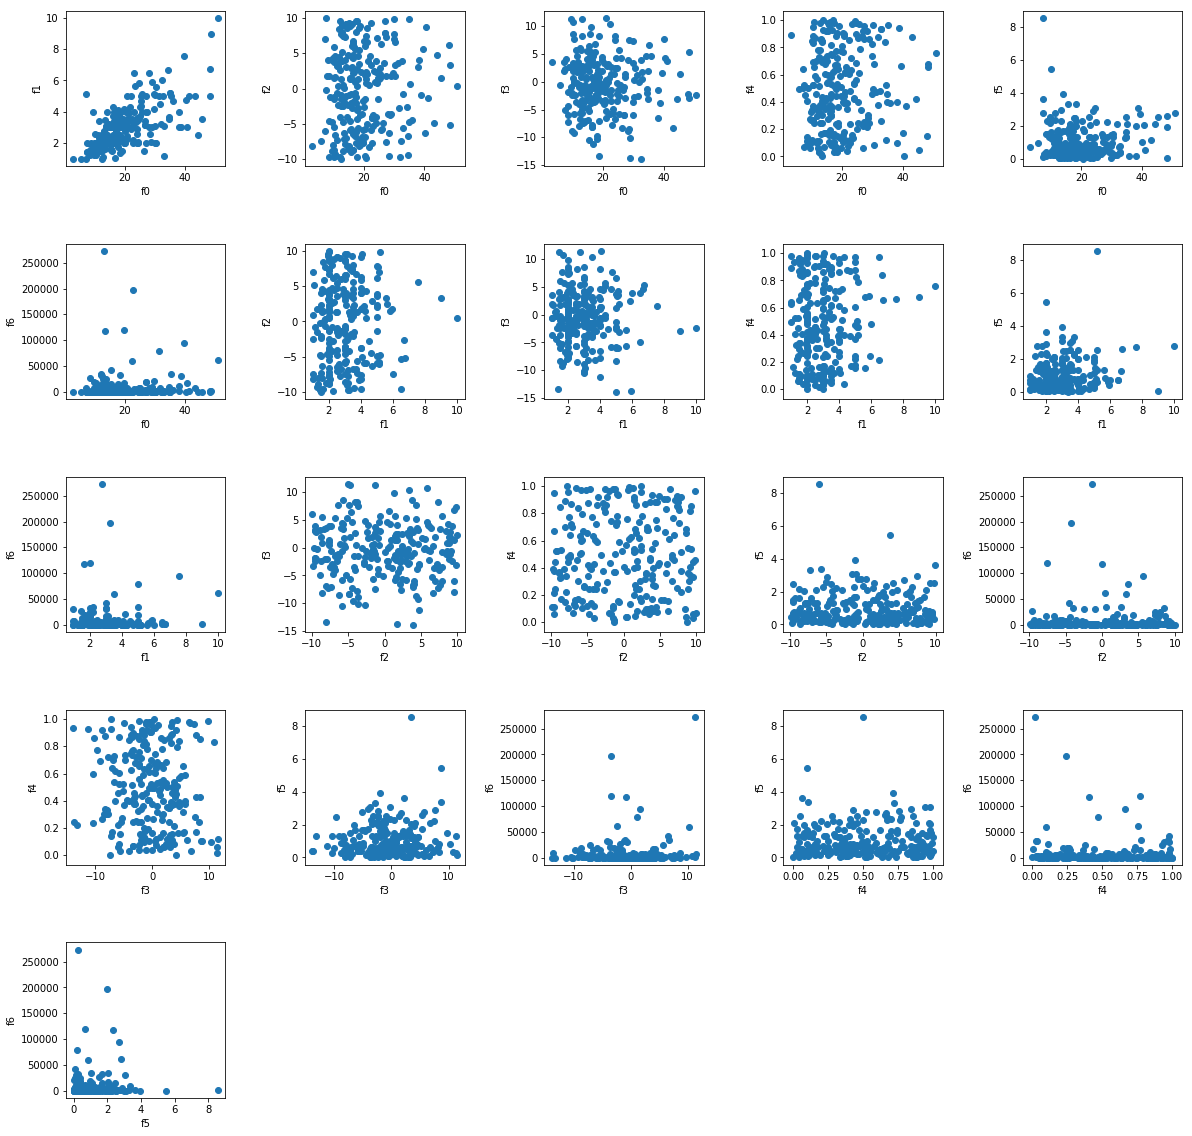

In [7]:
%pylab inline
import matplotlib.pyplot as plt

num_plots = df.shape[1] * (df.shape[1] - 1) / 2
ncol, nrow = 5, num_plots // 5 + (num_plots % 5 > 0)
plt.figure(figsize=(ncol * 4, nrow * 4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

labels_list = list(df)
num = 1
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        plt.subplot(nrow, ncol, num)
        plt.scatter(df[labels_list[i]], df[labels_list[j]])
        plt.xlabel(labels_list[i])
        plt.ylabel(labels_list[j])
        num += 1

На графике зависимости f6 от целевой переменной f1 видно, что признак f6 принимает почти константное значение, поэтому его зависимость от значения f1 очень слаба.
В то же время зависимость f0 от f1 напоминает линейную, что подтверждает выявленную алгоритмом сильную зависимость между переменными. Также кажется достаточно сильной зависимость f5 от f1, что подтверждается относительно большим по модулю значением соответствующего элемента вектора весов. 
Явная зависимость f2, f3 и f4 от целевой переменной не прослеживается, и в векторе весов соответствующие им элементы очень малы или даже равны нулю (для f2 и f3) в случае метода Lasso с минимаксным масштабированием.

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/15792971/

In [8]:
from sklearn.base import BaseEstimator
import numpy as np


class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='full',
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if(self.w0 is None):
            self.w0 = np.zeros(np.size(X, 1))
        self.w = self.w0.copy()
        w_diff = np.zeros(np.size(X, 1))
        num_iter = 0
        self.loss_history.append(self.calc_loss(X, y))
        while((np.sqrt(np.sum(w_diff ** 2)) >= self.tolerance and
               num_iter < self.max_iter) or num_iter == 0):
            if(self.gd_type == 'full'):
                w_diff = w_diff * self.alpha + \
                    self.eta * self.calc_gradient(X, y)
            elif(self.gd_type == 'stochastic'):
                sample = np.random.randint(np.size(X, 0))
                w_diff = w_diff * self.alpha + \
                    self.eta * self.calc_gradient(X[sample], y[sample])
            self.w -= w_diff
            num_iter += 1
            self.loss_history.append(self.calc_loss(X, y))
        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        if(X.ndim == 1):
            mod = np.sum(X * self.w) - y
            if(abs(mod) <= self.delta):
                grad = X * mod
            else:
                grad = self.delta * X * np.sign(mod)
        else:
            mod = np.dot(X, self.w) - y
            grad = np.zeros(np.size(X, 1))
            mask = np.abs(mod) <= self.delta
            grad += np.dot(X[mask].T, mod[mask])
            mask = np.logical_not(mask)
            grad += self.delta * np.dot(X[mask].T, np.sign(mod[mask]))
        return grad / np.size(y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        loss = 0.0
        mod = np.abs(y - np.dot(X, self.w))
        mask = mod <= self.delta
        loss += 0.5 * np.dot(mod[mask].T, mod[mask])
        mask = np.logical_not(mask)
        loss += np.sum(self.delta * mod[mask] - 0.5 * (self.delta ** 2))
        return loss / np.size(y)

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [9]:
x_train.insert(0, 1, 1)
x_test.insert(0, 1, 1)

In [10]:
from sklearn.metrics import r2_score
minmax = MinMaxScaler()
stand = StandardScaler()
huber_lr = HuberReg()
alpha_list = [10 ** x for x in range(-6, 0)] + [0]
gd_list = ['full', 'stochastic']
scorer_list = [('minmax', minmax), ('stand', stand)]
score_list_1 = list()
for gd in gd_list:
    for scorer in scorer_list:
        curr_score_list = list()
        for alpha in alpha_list:
            huber_lr = HuberReg(gd_type=gd, alpha=alpha)
            curr_huber = Pipeline([scorer, ('huber', huber_lr)]).fit(x_train.values, y_train.values)
            y_pred = curr_huber.predict(x_test.values)  
            curr_score_list.append(r2_score(y_test, y_pred))
        score_list_1.append(curr_score_list)

minmax scaling, full without momentum: [0.1748510673358239]
standard scaling, full without momentum: [-5.584431756403113]
minmax scaling, stochastic without momentum: [-0.8982020703779285]
minmax scaling, stochastic without momentum: [-5.479951655992242]


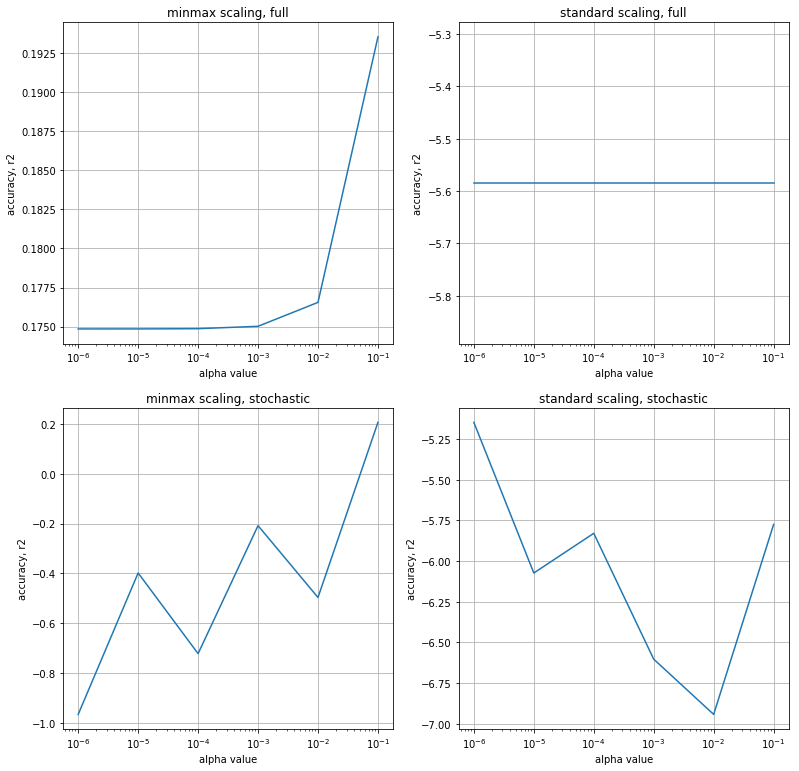

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13))

axs[0][0].semilogx(alpha_list[:-1], score_list_1[0][:-1])
axs[0][0].grid(True)
axs[0][0].set_title('minmax scaling, full')
axs[0][0].set_ylabel('accuracy, r2')
axs[0][0].set_xlabel('alpha value')

axs[0][1].semilogx(alpha_list[:-1], score_list_1[1][:-1])
axs[0][1].grid(True)
axs[0][1].set_title('standard scaling, full')
axs[0][1].set_ylabel('accuracy, r2')
axs[0][1].set_xlabel('alpha value')

axs[1][0].semilogx(alpha_list[:-1], score_list_1[2][:-1])
axs[1][0].grid(True)
axs[1][0].set_title('minmax scaling, stochastic')
axs[1][0].set_ylabel('accuracy, r2')
axs[1][0].set_xlabel('alpha value')

axs[1][1].semilogx(alpha_list[:-1], score_list_1[3][:-1])
axs[1][1].grid(True)
axs[1][1].set_title('standard scaling, stochastic')
axs[1][1].set_ylabel('accuracy, r2')
axs[1][1].set_xlabel('alpha value')

print('minmax scaling, full without momentum:', score_list_1[0][-1:])
print('standard scaling, full without momentum:', score_list_1[1][-1:])
print('minmax scaling, stochastic without momentum:', score_list_1[2][-1:])
print('minmax scaling, stochastic without momentum:', score_list_1[3][-1:])

По результатам экспериментов и полный, и стохастический градиентный спуск показывают самое высокое качество при использовании MinMaxScaler и значении параметра alpha максимально близком к единице. Попробуем подобрать другие значения параметра, уже не из логарифмической шкалы.


In [12]:
alpha_list = [0.1 * x for x in range(1, 10)]
gd_list = ['full', 'stochastic']
score_list_2 = list()
for gd in gd_list:
    curr_score_list = list()
    for alpha in alpha_list:
        huber_lr = HuberReg(gd_type=gd, alpha=alpha)
        curr_huber = Pipeline([('minmax', minmax), ('huber', huber_lr)]).fit(x_train.values, y_train.values)
        y_pred = curr_huber.predict(x_test.values)  
        curr_score_list.append(r2_score(y_test, y_pred))
    score_list_2.append(curr_score_list)

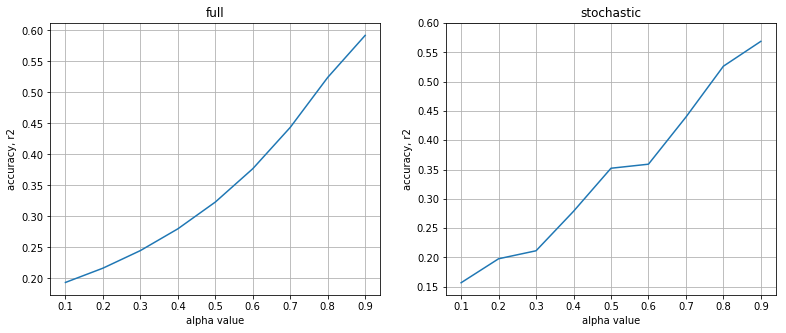

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

axs[0].plot(alpha_list, score_list_2[0])
axs[0].grid(True)
axs[0].set_title('full')
axs[0].set_ylabel('accuracy, r2')
axs[0].set_xlabel('alpha value')

axs[1].plot(alpha_list, score_list_2[1])
axs[1].set_yticks(np.arange(0.15, 0.65, 0.05))
axs[1].set_title('stochastic')
axs[1].set_ylabel('accuracy, r2')
axs[1].set_xlabel('alpha value')
axs[1].grid(True)

Максимальное качество достигается при значении alpha=0.9, то есть при наибольшем из рассмотренных. Исследуем точность при значениях параметра, больших, чем 0.9.

In [37]:
alpha_list = [0.9 + 0.01 * x for x in range(0, 10)]
gd_list = ['full', 'stochastic']
score_list_4 = list()
for gd in gd_list:
    curr_score_list = list()
    for alpha in alpha_list:
        huber_lr = HuberReg(gd_type=gd, alpha=alpha)
        curr_huber = Pipeline([('minmax', minmax), ('huber', huber_lr)]).fit(x_train.values, y_train.values)
        y_pred = curr_huber.predict(x_test.values)  
        curr_score_list.append(r2_score(y_test, y_pred))
    score_list_4.append(curr_score_list)

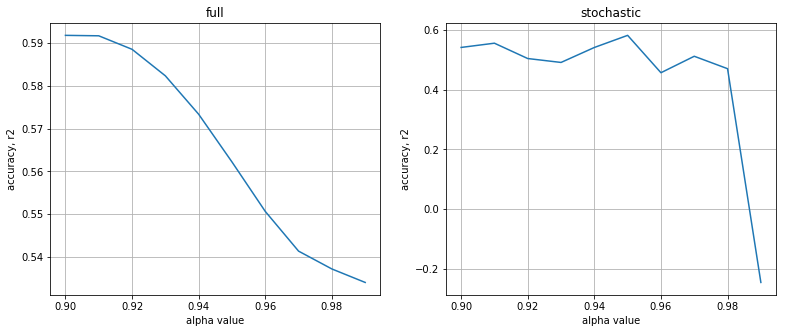

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

axs[0].plot(alpha_list, score_list_4[0])
axs[0].grid(True)
axs[0].set_title('full')
axs[0].set_ylabel('accuracy, r2')
axs[0].set_xlabel('alpha value')

axs[1].plot(alpha_list, score_list_4[1])
axs[1].set_title('stochastic')
axs[1].set_ylabel('accuracy, r2')
axs[1].set_xlabel('alpha value')
axs[1].grid(True)

Momentum позволяет сгладить шум в данных, двигаться в сторону глобального снижения значения функции потерь, игнорируя незначительные колебания направления ее антиградиента. При маленьких значениях параметра шум подавляется недостаточно сильно, что приводит к потере качества алгоритма. При слишком больших значениях сглаживание получается слишком сильным, что снова приводит к потере качества. Это подтверждается результатами экспериментов: оптимальным значением параметра является alpha=0.9, при бОльших или меньших значениях полученное качество хуже.  Исследуем зависимость точности от числа итераций при найденном оптимальном значении alpha.

In [43]:
iter_list = [10 ** x for x in range(2, 7)]
gd_list = ['full', 'stochastic']
score_list_3 = list()
for gd in gd_list:
    curr_score_list = list()
    for iter in iter_list:
        huber_lr = HuberReg(gd_type=gd, alpha=0.9, max_iter=iter)
        curr_huber = Pipeline([('minmax', minmax), ('huber', huber_lr)]).fit(x_train.values, y_train.values)
        y_pred = curr_huber.predict(x_test.values)  
        curr_score_list.append(r2_score(y_test, y_pred))
    score_list_3.append(curr_score_list)

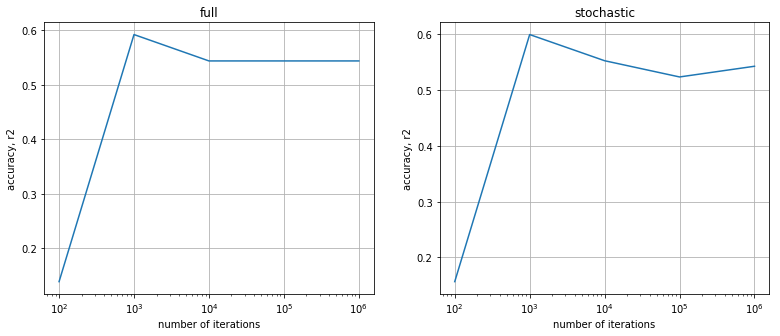

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

axs[0].semilogx(iter_list, score_list_3[0])
axs[0].grid(True)
axs[0].set_title('full')
axs[0].set_ylabel('accuracy, r2')
axs[0].set_xlabel('number of iterations')

axs[1].semilogx(iter_list, score_list_3[1])
axs[1].set_title('stochastic')
axs[1].set_ylabel('accuracy, r2')
axs[1].set_xlabel('number of iterations')
axs[1].grid(True)

По результатам экспериментов, оптимальным числом итераций является 1000. Возможно, дело в том, что используется алгоритм с постоянным шагом, поэтому даже при приближении к точке минимума он не может остановиться точно в точке, разность весов не уменьшается до требуемой в условии остановки, а продолжает изменяться. Алгоритм продолжает движение в окрестности точки, многократно "перепрыгивая" через нее. Поэтому при увеличении числа итераций качество ухудшается. Пр уменьшении числа итераций алгоритм не успевает сойтись, поэтому качество также хуже.

Выведем точность, достигаемую алгоритмами с оптимальным набором параметров (1000 итераций, значение параметра равно 0.9)

In [22]:
print('full gradient descent score:', score_list_3[0][0])
print('stochastic gradient descent score:', score_list_3[1][0])

full gradient descent score: 0.5918545680091027
stochastic gradient descent score: 0.5837541148090755


Достигнутая точность предсказаний выше, чем у предыдущих рассмотренных алгоритмов.

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

In [ ]:
huber_lr = HuberReg(gd_type='full', alpha=0, max_iter=1000)
huber_full = Pipeline([('minmax', minmax), ('huber', huber_lr)]).fit(x_train.values, y_train.values)
huber_full.predict(x_test.values)

huber_lr = HuberReg(gd_type='stochastic', alpha=0, max_iter=1000)
huber_stochastic = Pipeline([('minmax', minmax), ('huber', huber_lr)]).fit(x_train.values, y_train.values)
huber_stochastic.predict(x_test.values)

huber_lr = HuberReg(gd_type='full', alpha=0.9, max_iter=1000)
huber_full_momentum = Pipeline([('minmax', minmax), ('huber', huber_lr)]).fit(x_train.values, y_train.values)
huber_full_momentum.predict(x_test.values)

In [218]:
loss_list_1 = huber_full.named_steps['huber'].loss_history
loss_list_2 = huber_stochastic.named_steps['huber'].loss_history
loss_list_3 = huber_full_momentum.named_steps['huber'].loss_history

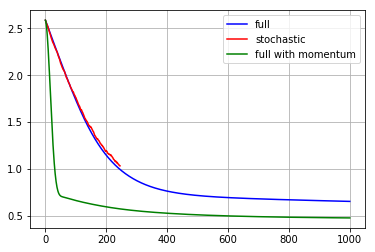

In [222]:
plt.plot(np.arange(np.size(loss_list_1)), loss_list_1, c='b', label='full')
plt.plot(np.arange(np.size(loss_list_2)), loss_list_2, c='r', label='stochastic')
plt.plot(np.arange(np.size(loss_list_3)), loss_list_3, c='g', label='full with momentum')
plt.legend()
plt.grid(True)

Стохастический метод без инерции сходится хуже всего, тк на каждом шаге учитывается изменение направления яантиградиента только по одной из размерностей, поэтому вектор весов начинает меняться слишком медленно и достигается условие остановки (норма разностей вектора весов на соседних итерациях становится меньше заданного числа) когда алгоритм еще не сошелся. Быстрее всего сходится полный градиентный спуск с инерцией (ранее было написано о преимуществах сглаживания данных, которое производится при использовании инерции)